# Complexidade de problemas

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/main/lectures/01_02_Teoria_da_Complexidade.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Problemas possuem complexidades diferentes. Por isso existem classes de complexidades.
* Da teoria de algoritmos, sabemos que algoritmos podem ter sua complexidade estimada (ex: notação big-O)
* Usamos essa estimativa para **classificar os problemas**

Complexity Zoo: https://complexityzoo.net


## Tipos de problemas computacionais

Problemas de interesse da computação

* Problema de decisão
  * Verifique se uma certa propriedade existe
  * Saída do tipo SIM/NÃO, EXISTE/NÃO EXISTE...
* Problema de busca
  * Encontrar uma solução que atenda um requisito do problema
* Problema de otimização
  * Encontrar uma solução que minimiza (ou maximiza) alguma propriedade no contexto do problema

Há correlação entre estes tipos de problemas.

**Exemplo**: <u>menor caminho</u>.
* Otimização: Encontre o menor caminho.
* Busca: Dado o custo do menor caminho, encontre um caminho com este custo.
* Decisão: Dado o custo do menor caminho, existe um caminho com este custo.

**Exemplo**: <u>Soma de subconjunto</u>.
* Decisão: Existe um subconjunto cuja soma é X?
* Busca: Encontre um subconjunto cuja soma é X.
* Otimização: Encontre um subconjunto cuja soma é X e que use o menor número de elementos.

**Exercício**: encontrar um algoritmo que solucione a versão de otimização da soma de subconjunto.

### Solução

In [ ]:
def powerset(C):
    powerset = [[]]
    for e in C:
        subsets = []
        for subset in powerset:
            subsets = subsets + [subset + [e]]
        powerset = powerset + subsets
    return powerset

def subsetsum(C,X):
    """
        Faça o código de um algoritmo força bruta para solucionar a versão de
        de otimização do problema da soma de subconjunto

        C: lista representando o conjunto de inteiros
        X: o número inteiro
        Retorno: Deve ser uma lista representando o menor subconjunto de C cuja
        soma é X
    """
    solucao = [0]*(len(C)+1)   #Inicializa com uma solução inválida com tamanho maior que C
    PC = powerset(C)           #Cria o conjunto das partes de C
    for subc in PC:            #Itera sobre cada elemento do conjunto das partes (força bruta)
      if sum(subc) == X and len(subc) < len(solucao): # checa se subconjunto atende à soma & checa se a solução é melhor
        solucao = subc
    if len(solucao) == len(C)+1: #checa se encontrou solução
      return None
    else:
      return solucao

S = range(10)
Sum = 15
subset = subsetsum(S,Sum)
print("O subconjunto que soma "+str(Sum)+" é "+str(subset))

O subconjunto que soma 15 é [7, 8]


## Classe P

* Para alguns problemas conhecemos algoritmos de tempo polinomial
* Se há algoritmo de tempo polinomial que encontra solução para o problema, então o problema pertence à **P**
  * Formalmente, só problemas de decisão estão em **P**, mas "na prática" acabamos aplicando dizendo que um problema de otimização pertence à **P**, por analogia
* Exemplo: menor caminho (Algoritmo de Djikstra), ordenação (diferentes algoritmos), buscas em árvore (busca em profundidade e largura)

##Classe NP

* Verificar se uma dada solução é realmente solução do problema, pode ser "mais fácil" do que encontrar a solução
   * **Verificador**: verificador para um problema é um algoritmo que determina se uma dada solução é realmente solução do problema

* Um problema é polinomialmente verificável se o verificador roda em tempo polinomial.
* **NP** é a classe de linguagens que têm verificadores de tempo polinomial

Exemplos:

* SAT
 * O que é?
 * Verificador polinomial

* SOMA-SUBC
 * O que é?
 * Algoritmo da força bruta
 * Verificador polinomial

* Força bruta pode resolver vários problemas, mas é ineficiente. Existem problemas onde a força bruta é a única alternativa. Não conhecemos algoritmos de tempo polinomial.

# P vs NP

**Definições**
* NP é a classe de problemas cuja solução pode ser verificada em tempo polinomial (rapidamente).
* P é a classe de problemas cuja solução pode ser decidida em tempo polinomial (rapidamente).
* P e NP são aplicados a problemas de decisão, propriamente

**O que sabemos?**
* Não se sabe se SOMA-SUBC está em P, não temos algoritmos que decida este problema em tempo polinomial.
* Por outro lado, somos incapazes de provar que um problema em NP não está em P.
* A questão de se P = NP é um dos maiores problemas não resolvidos em computação teórica e matemática.
* Existem duas possibilidades $P = NP$ ou $P \neq NP$.

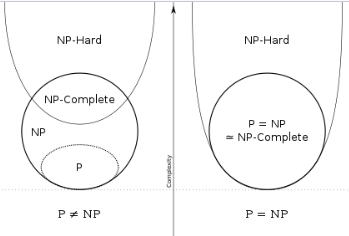

## NP-hardness

**Redução**
* O princípio da redução de problemas, permite mostrar que problemas podem ser modificados uns nos outros
 * O que é redução de A para B? Um algoritmo que sempre leva toda instância de um problema A em uma instância de B.
 * Na complexidade, gostamos de reduções em tempo polinomial.

* Se A é redutível em tempo polinomial a B e $B \in P$, então $A \in P$.

**NP-Completude**
* Na década de 70 Stephen Cook e Leonid Levin observaram que a complexidade de alguns problemas parece estar interligada. São os problemas NP-completos.

**Definição**: Uma linguaguem B é NP-Completa se satisfaz duas condições:
1. $B \in NP$; e
2. todo problema $A \in NP$ é redutível em tempo polinomial a B.

* O problema SAT é fundamental, porque Cook e Levin demonstraram que SAT é NP-Completo
* Se B é NP-completa e B se reduz a C em tempo polinomial, então C é NP-Completa

**NP-Difícil (NP-hard)**
* Um problema é NP-hard se todos os problemas em NP são reduzíveis a ele.
* Problemas que não estão necessariamente em NP, mas para os quais os NP completos podem se reduzir.
* Se um problema NP-hard pode ser resolvido em tempo polinomial então todos os problemas NP-completos podem ser resolvidos em tempo polinomial.

# E nós com isso?

Os problemas de interesse que vemos em otimização são, muitas das vezes, problemas NP-hard. Mas a teoria nos leva a ter dois cuidados:
1. Nós costumamos trabalhar com a hipótese de que $P \neq NP$, ou seja, se o problema é NP-hard vamos procurar soluções aproximadas
2. Alguns problemas de otimização têm solução polinomial, por isso a modelagem e classificação do problema é importante

Quero saber mais! Leia

* Cap 2 do livro do Xin-She Yang; ou
* Cap 7 do livro do Sipser

Yang, Xin-She. Optimization techniques and applications with examples. John Wiley & Sons, 2018.

Sipser, Michael. Introdução à Teoria da Computação: Trad. 2ª ed. norte-americana. Disponível em: Minha Biblioteca, Cengage Learning Brasil, 2007.
